In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn import preprocessing
import warnings

In [2]:
data = pd.read_csv('hotel_bookings.csv')
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
# 결측치 확인
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
data.info()
# 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# 'children'은 결측치를 median으로 채움
# median 값을 확인했을 때 값이 0인 점, mean값이 0.103890이 0에 가까운 점을 고려함
data['children'].fillna(data['children'].median(), inplace=True)

In [7]:
# country는 unknown으로 채움
data['country'].fillna('unknown', inplace=True)

In [8]:
data.drop(columns='company', axis=1, inplace = True)
# company는 결측치가 너무 많아서 삭제함

In [9]:
data['agent'].fillna(0, inplace=True)
# agent는 0으로 채움

In [10]:
#결측치 제거 확인
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

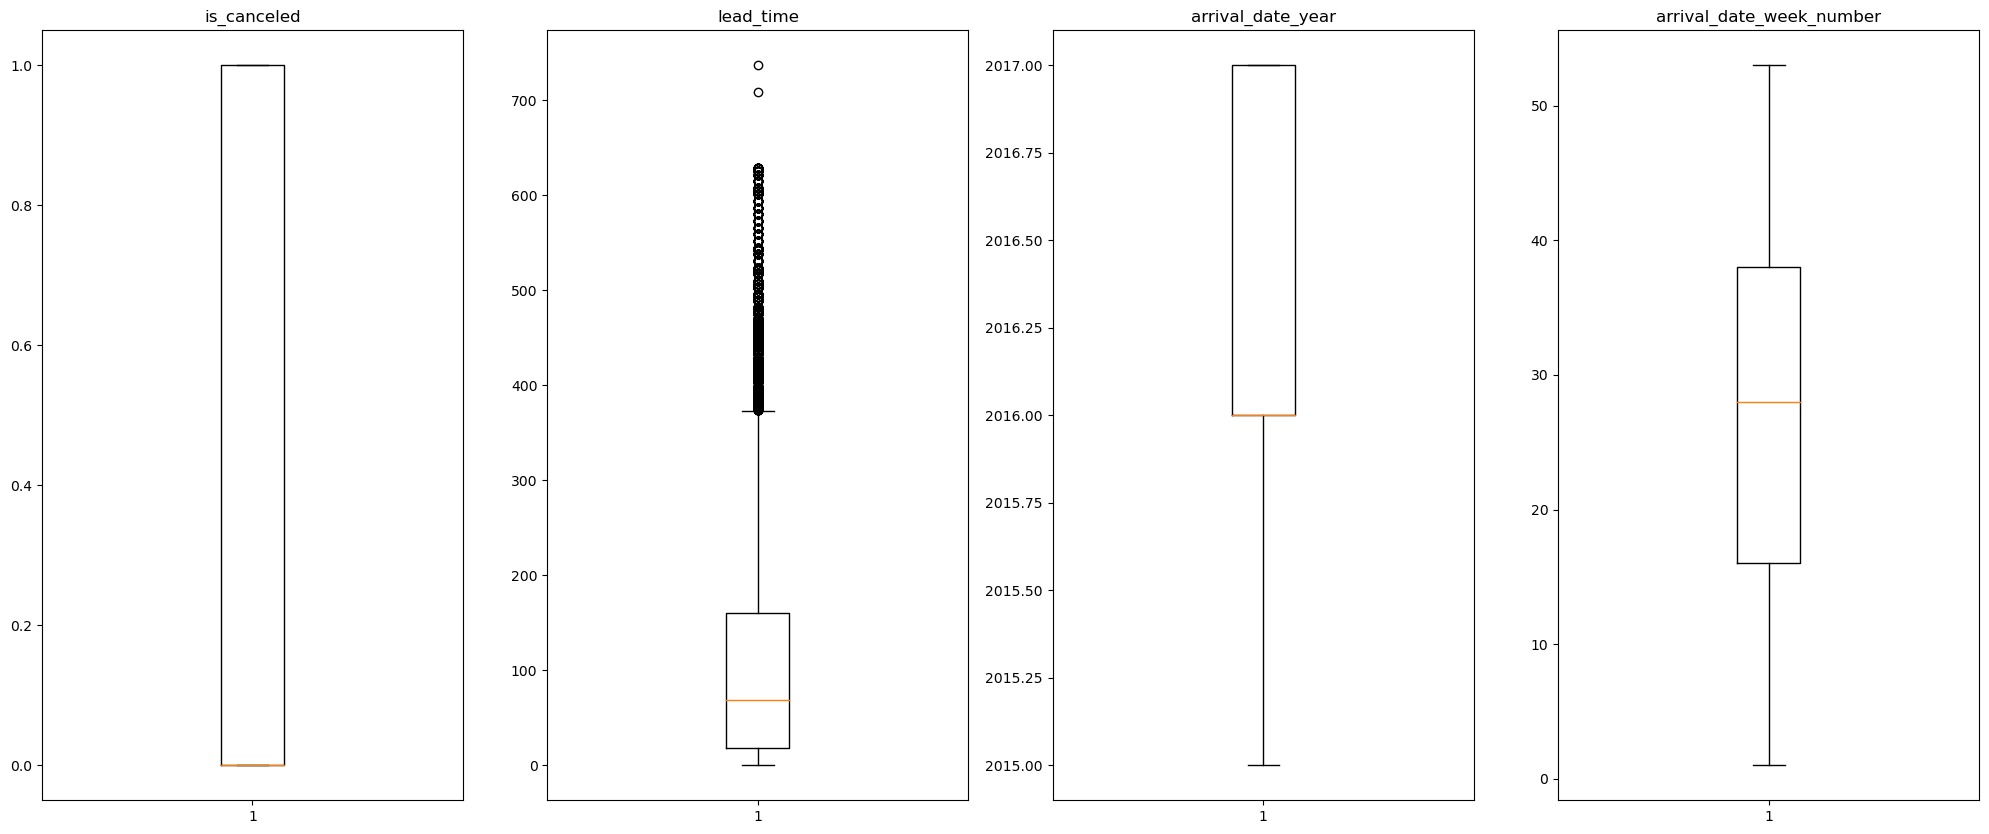

In [11]:
#박스플롯 그리기
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25,10))
for i in range(0,4):
    ax[i].boxplot(data[data.describe().columns[i]])
    ax[i].set_title(data.describe().columns[i])

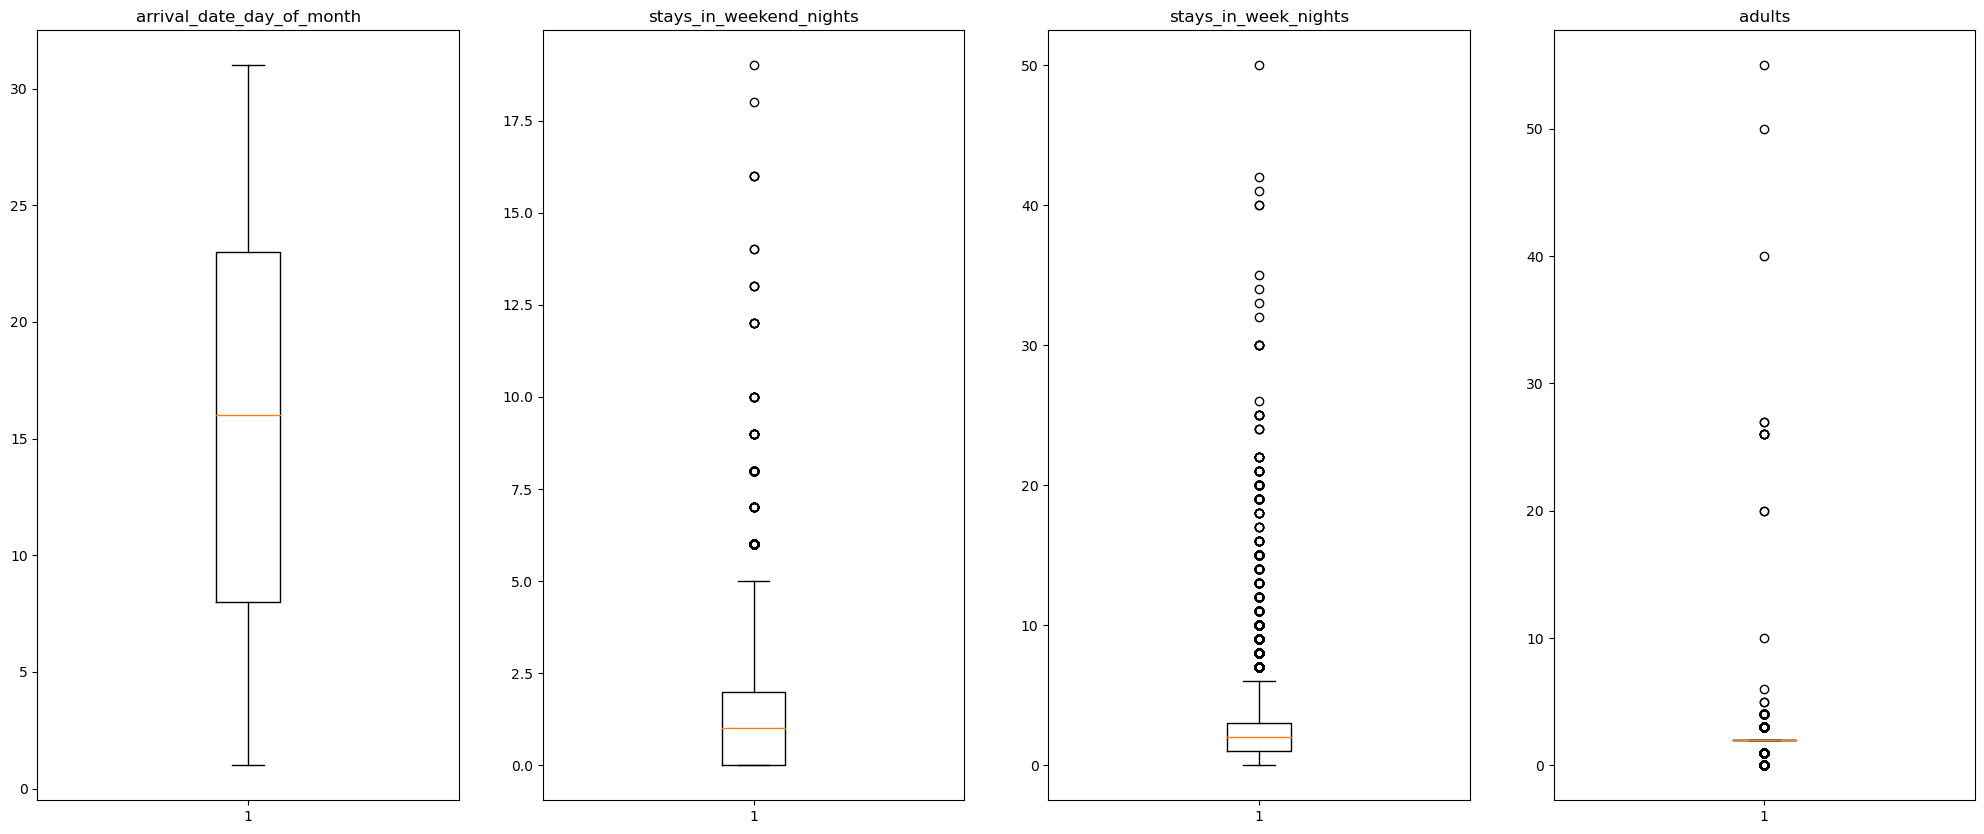

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25,10))
for i in range(0,4):
    ax[i].boxplot(data[data.describe().columns[i+4]])
    ax[i].set_title(data.describe().columns[i+4])

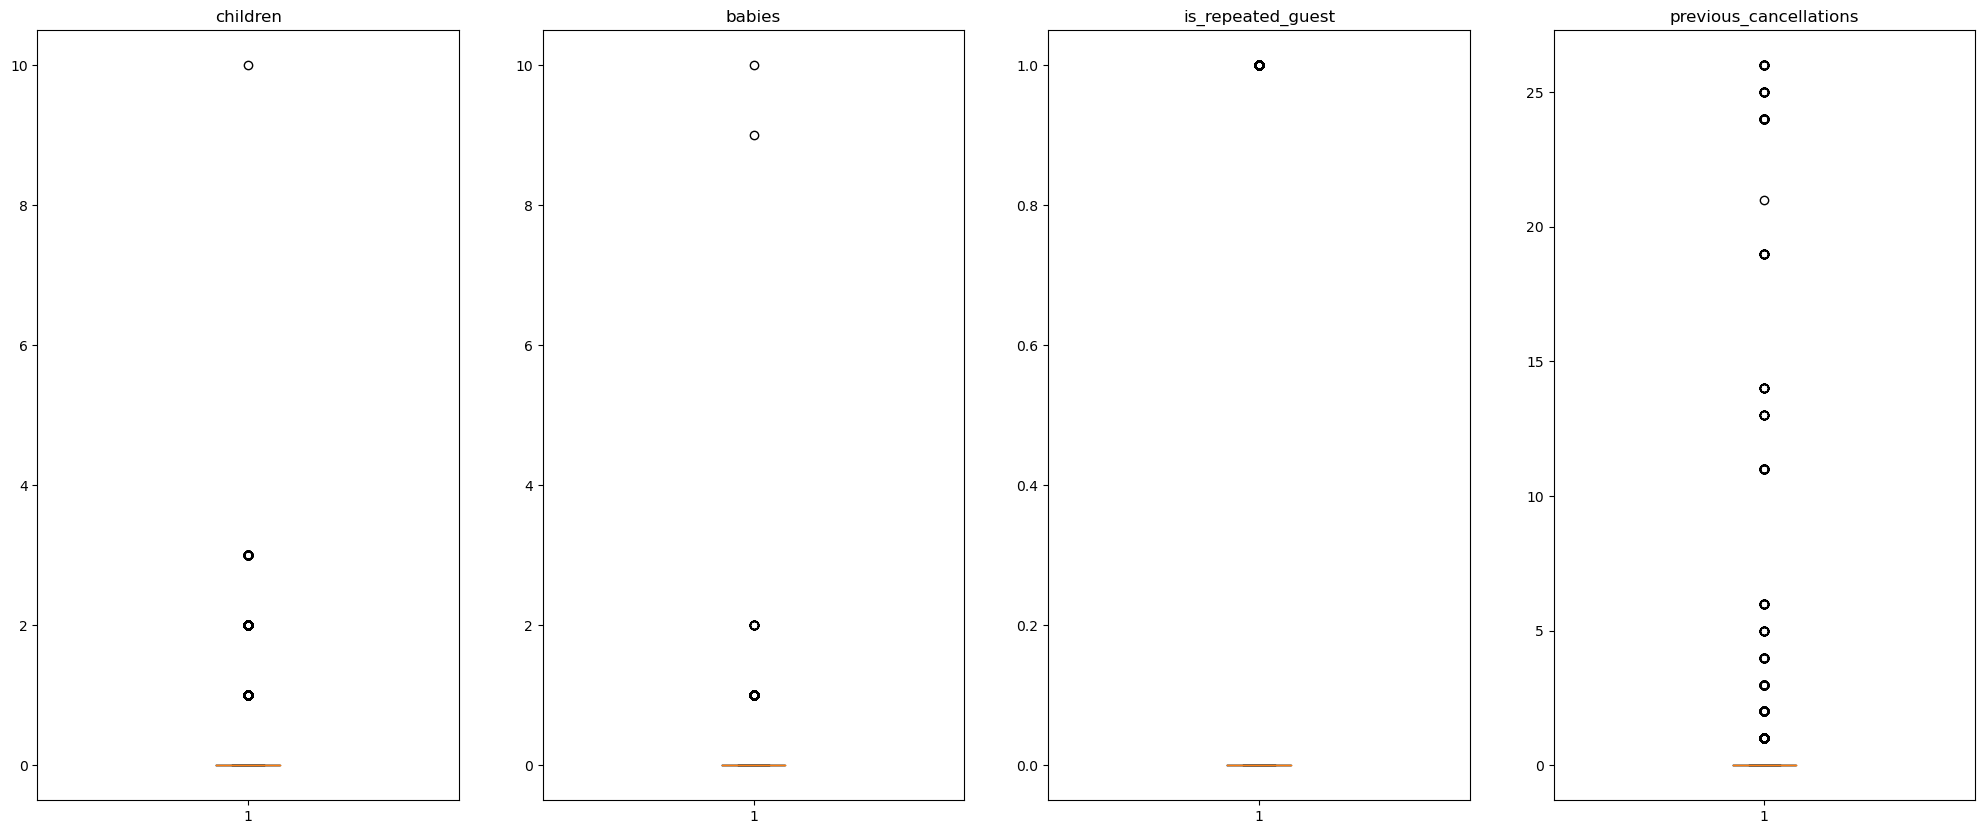

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25,10))
for i in range(0,4):
    ax[i].boxplot(data[data.describe().columns[i+8]])
    ax[i].set_title(data.describe().columns[i+8])

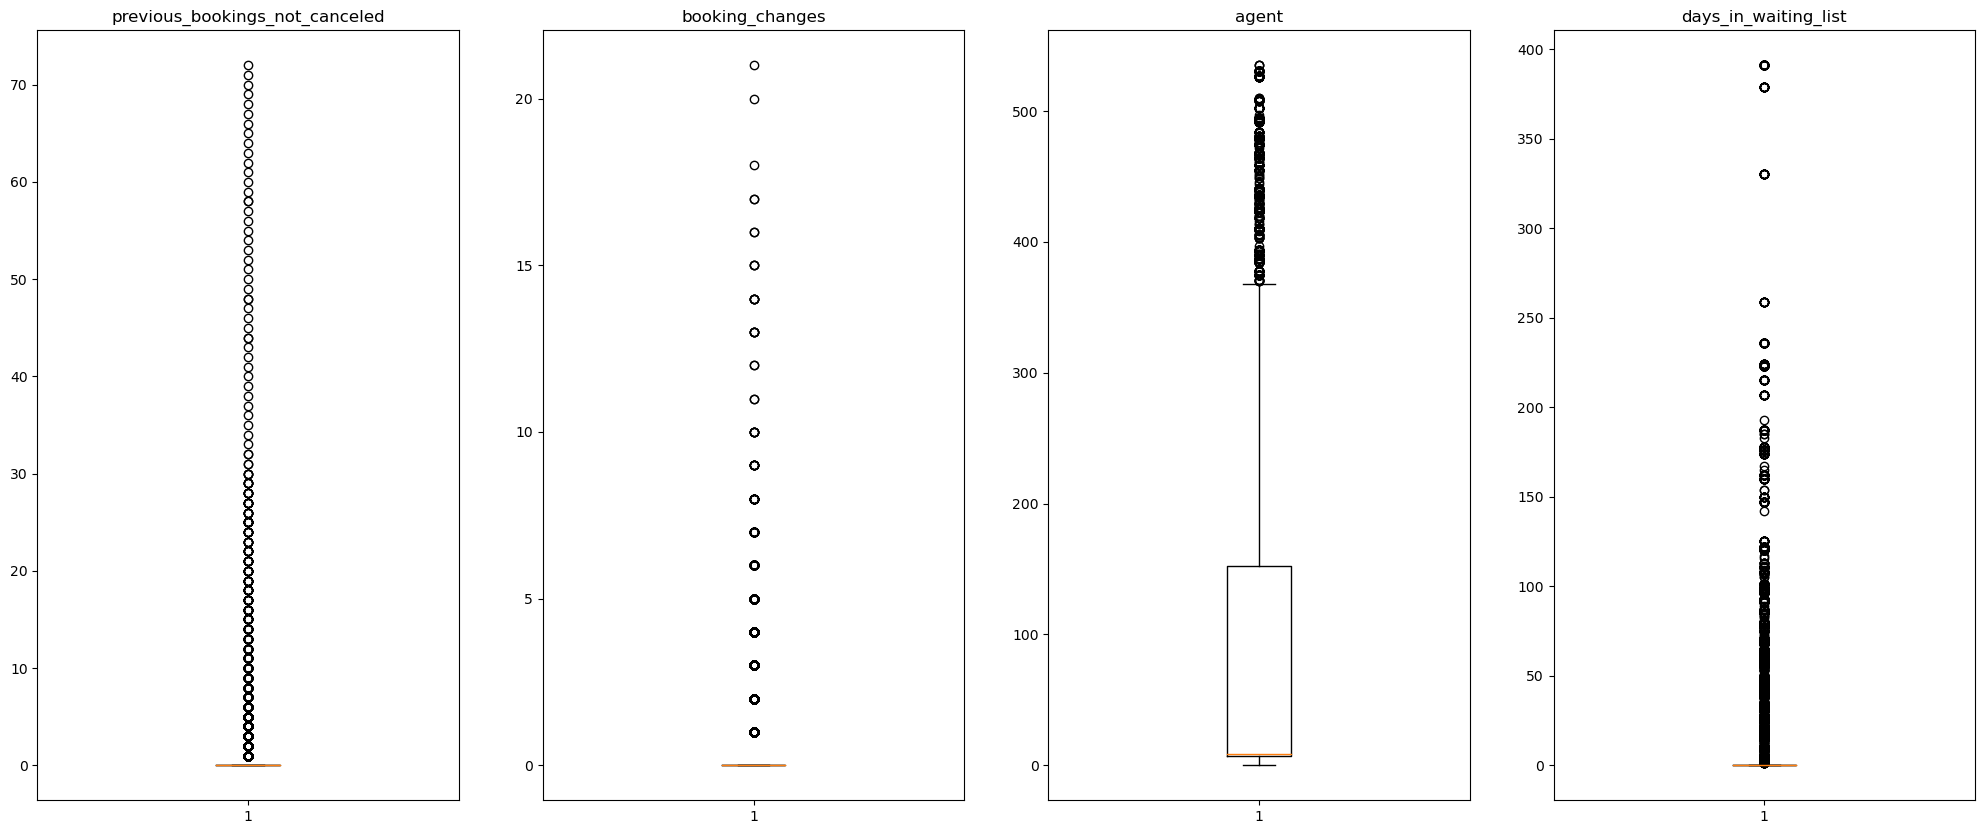

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25,10))
for i in range(0,4):
    ax[i].boxplot(data[data.describe().columns[i+12]])
    ax[i].set_title(data.describe().columns[i+12])

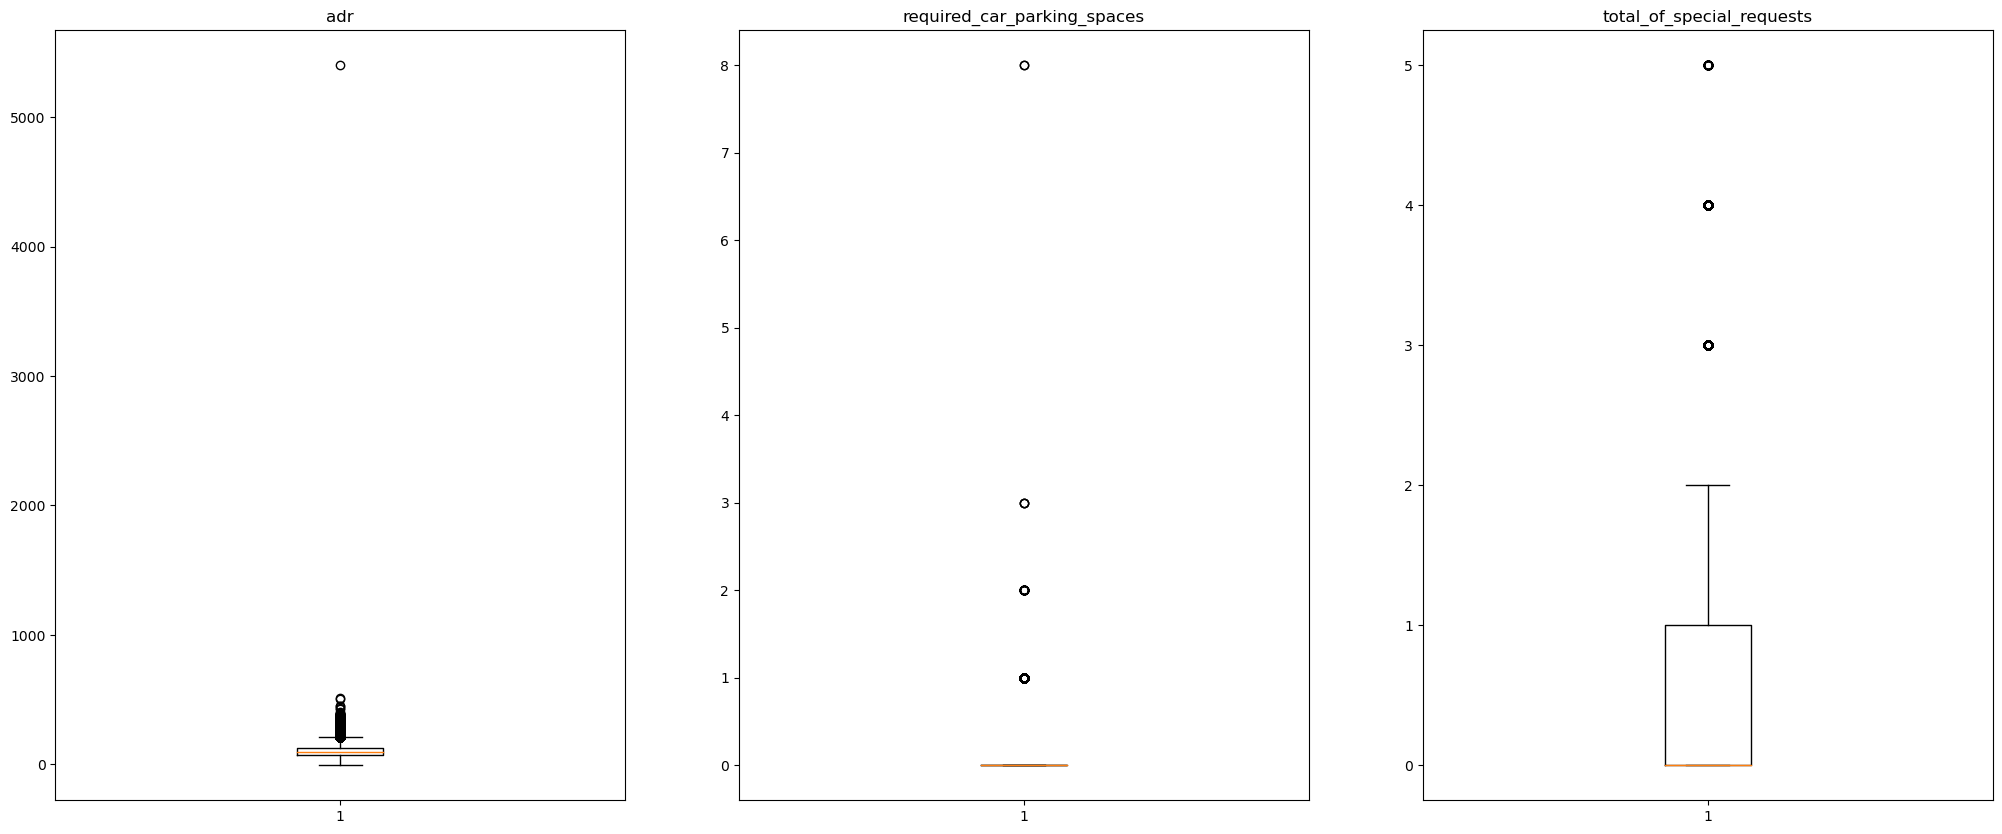

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,10))
for i in range(0,3):
    ax[i].boxplot(data[data.describe().columns[i+16]])
    ax[i].set_title(data.describe().columns[i+16])

- 이상치가 존재하는 컬럼
- lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests

In [16]:
a = "lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests"
outlier_list = []
for x in a.split(', '):
    outlier_list.append(x)

In [17]:
#이상치 존재 컬럼
outlier_list

['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [18]:
import numpy as np
def calculate_iqr(data):
    # 데이터를 NumPy 배열로 변환합니다.
    data_array = np.array(data)
    
    # 1사분위수(Q1)와 3사분위수(Q3)를 계산합니다.
    q1 = np.percentile(data_array, 25)
    q3 = np.percentile(data_array, 75)
    
    # IQR을 계산합니다.
    iqr = q3 - q1
    
    return iqr

In [19]:
calculate_iqr(data['lead_time'])
# 작동 확인

142.0

In [20]:
IQR_list = []
for x in outlier_list:
    IQR_list.append(calculate_iqr(data[x])*1.5 + data[x].median()) # 바로 이상치가 되는 경계를 넣어버리자!

In [21]:
IQR_list
# 작동 확인

[282.0,
 4.0,
 5.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 226.5,
 0.0,
 179.64,
 0.0,
 1.5]

In [22]:
# 이상치 제거를 해서 다른 변수에 옮김
import copy
data_copy = copy.deepcopy(data)
for i in range (0,len(outlier_list)):
    data_copy.drop(data_copy[data_copy[outlier_list[i]] > IQR_list[i]].index, axis=0, inplace=True)

In [23]:
data_copy

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,15.0,0,Transient,105.50,0,0,Canceled,2015-04-22
16,Resort Hotel,0,37,2015,July,27,1,0,4,2,...,0,No Deposit,8.0,0,Contract,97.50,0,0,Check-Out,2015-07-05
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,0,No Deposit,0.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119379,City Hotel,0,109,2017,August,35,31,1,3,2,...,0,No Deposit,9.0,0,Transient,155.00,0,1,Check-Out,2017-09-04
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,0,No Deposit,9.0,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,0,No Deposit,14.0,0,Transient,99.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,0,No Deposit,42.0,0,Transient,87.60,0,0,Check-Out,2017-09-06


In [24]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [25]:
# data는 값을 직접 검토하고 이상치 제거함

data.drop(data[data['adults']+data['babies']+data['children'] == 0].index, inplace = True)
# 총 인원수가 0명인 경우를 이상치로 판단하여 이상치 제거!

<Axes: >

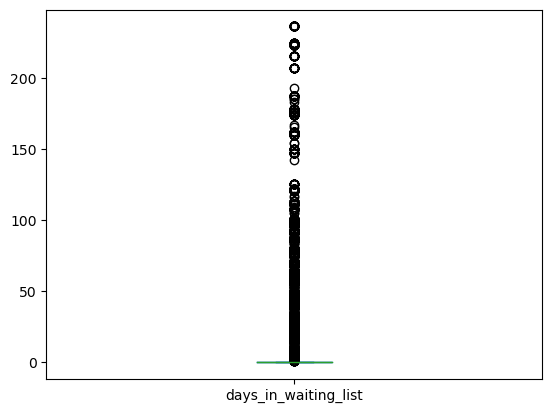

In [26]:
data = data.loc[data[data['days_in_waiting_list'] < 250].index]
# 예약하는 데에 250 일 이상 걸린 경우는 이상치로 판단하고 제거!
data['days_in_waiting_list'].plot(kind='box')

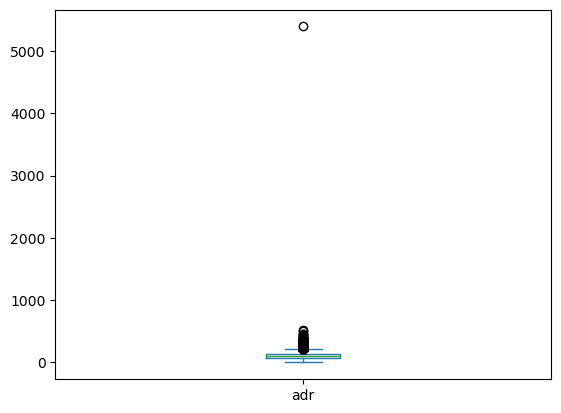

In [27]:
data['adr'].plot(kind='box')
data.drop(data[data['adr'] <= 0].index, inplace = True)
data.drop(data[data['adr'] > 5000].index, inplace = True)

#숙박비가 0 이하인 것 제거, 5000을 넘는 동떨어진 outlier 제거

In [28]:
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights'] #전체 투숙일 변수 추가
data['human_count'] = data['adults'] + data['children'] + data['babies'] #전체 투숙객 변수 추가

In [29]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,human_count
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2.0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2.0


In [30]:
numeric_data = data[['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','human_count','total_stay']]

In [31]:
#상관관계 확인
numeric_data.corr()

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,human_count,total_stay
lead_time,1.000000,0.087983,-0.069545,0.002074,0.149986,-0.089683,-0.117449,-0.094179,0.064541,0.152952
previous_cancellations,0.087983,1.000000,0.147345,-0.027178,0.009095,-0.071412,-0.018510,-0.051772,-0.021411,-0.015368
previous_bookings_not_canceled,-0.069545,0.147345,1.000000,0.011985,-0.008951,-0.064030,0.050170,0.024145,-0.107614,-0.049460
booking_changes,0.002074,-0.027178,0.011985,1.000000,-0.012164,0.038618,0.069054,0.056518,0.011116,0.073092
days_in_waiting_list,0.149986,0.009095,-0.008951,-0.012164,1.000000,-0.042068,-0.032293,-0.089282,-0.035661,-0.020188
adr,-0.089683,-0.071412,-0.064030,0.038618,-0.042068,1.000000,0.061403,0.191096,0.435625,0.051000
required_car_parking_spaces,-0.117449,-0.018510,0.050170,0.069054,-0.032293,0.061403,1.000000,0.081159,0.053812,-0.026796
total_of_special_requests,-0.094179,-0.051772,0.024145,0.056518,-0.089282,0.191096,0.081159,1.000000,0.178580,0.082586
human_count,0.064541,-0.021411,-0.107614,0.011116,-0.035661,0.435625,0.053812,0.178580,1.000000,0.126329
total_stay,0.152952,-0.015368,-0.049460,0.073092,-0.020188,0.051000,-0.026796,0.082586,0.126329,1.000000


<Axes: >

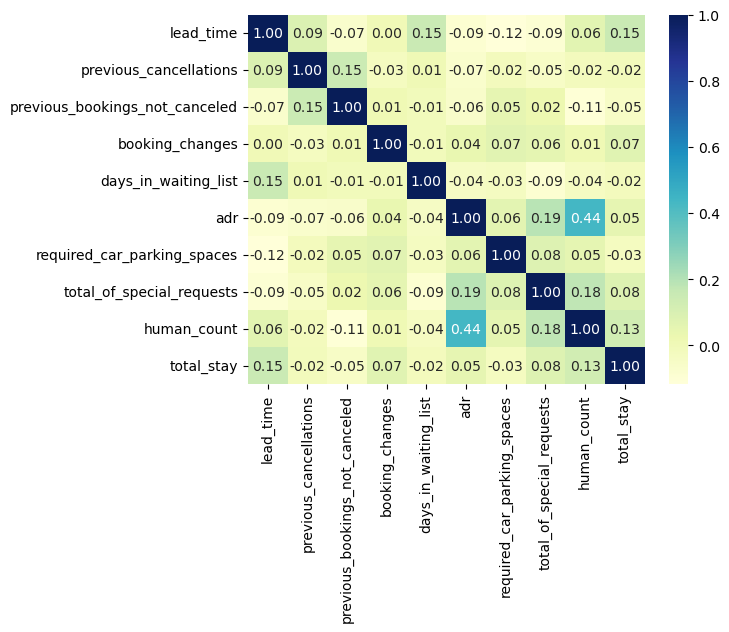

In [32]:
sns.heatmap(numeric_data.corr(),fmt='.2f',annot_kws={'size':10},annot=True,cmap="YlGnBu")

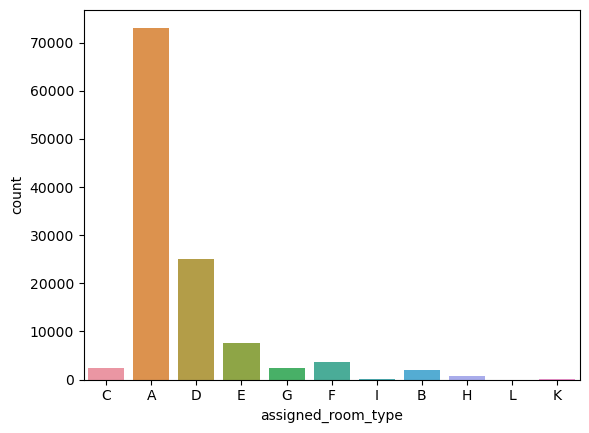

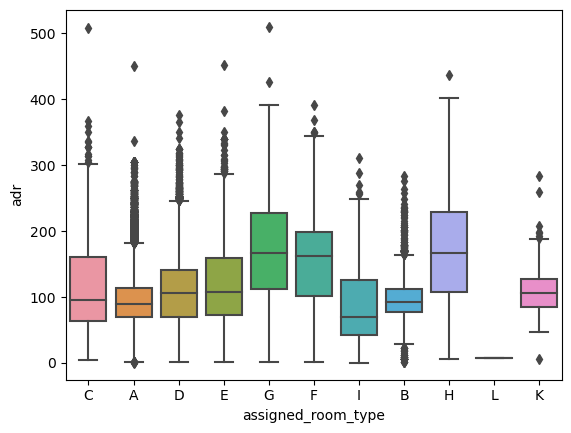

In [33]:
#room type - adr 관계 확인

sns.countplot(x = data['assigned_room_type'])
plt.figure()
sns.boxplot(x=data['assigned_room_type'], y =data['adr'])
plt.show()

<Figure size 640x480 with 0 Axes>

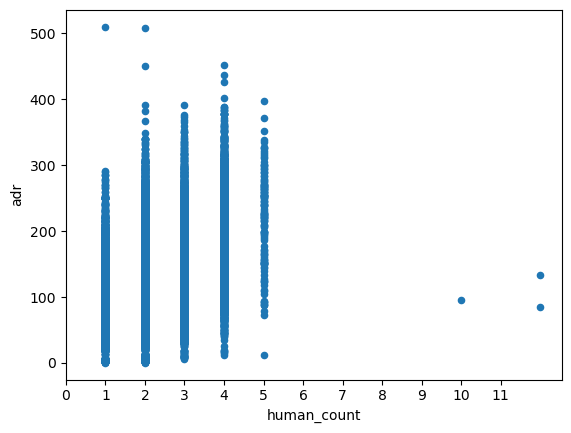

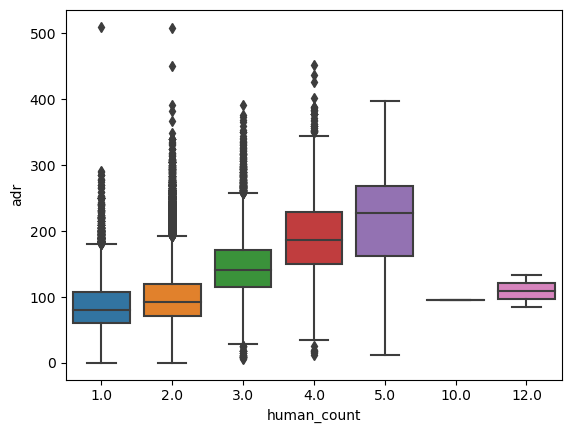

In [34]:
#고객수 - adr와의 관계

plt.figure()
data.plot(kind='scatter', x='human_count', y='adr',xticks=np.arange(0,12,1))
plt.show()

plt.figure()
sns.boxplot(x=data['human_count'], y =data['adr'])
plt.show()

<Figure size 1500x1500 with 0 Axes>

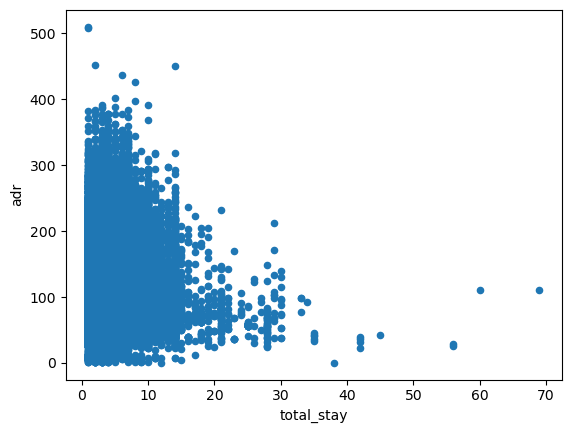

<Figure size 4000x1500 with 0 Axes>

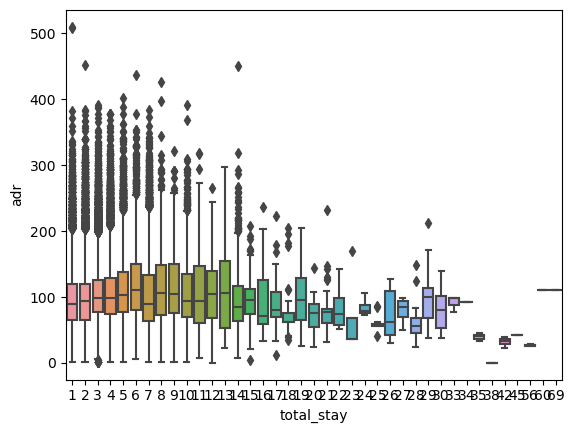

In [35]:
#머무는 시간 - adr과의 관계

plt.figure(figsize = (15,15))
data.plot(kind='scatter', x='total_stay', y='adr')
plt.show()


plt.figure(figsize = (40,15))
plt.figure()
sns.boxplot(x=data['total_stay'], y =data['adr'])
plt.show()

In [36]:
#정규화 진행 후 시각화 차이 확인
#robust 정규화 이용
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_data = scaler.fit_transform(numeric_data)
scaled_df = pd.DataFrame(scaled_data, columns = numeric_data.columns)

scaled_df.head()

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,human_count,total_stay
0,-0.447552,0.0,0.0,0.0,0.0,-0.361795,0.0,0.0,-1.0,-1.0
1,-0.405594,0.0,0.0,0.0,0.0,-0.361795,0.0,0.0,-1.0,-1.0
2,-0.398601,0.0,0.0,0.0,0.0,0.054269,0.0,1.0,0.0,-0.5
3,-0.398601,0.0,0.0,0.0,0.0,0.054269,0.0,1.0,0.0,-0.5
4,-0.496503,0.0,0.0,0.0,0.0,0.217077,0.0,0.0,0.0,-0.5


<Figure size 640x480 with 0 Axes>

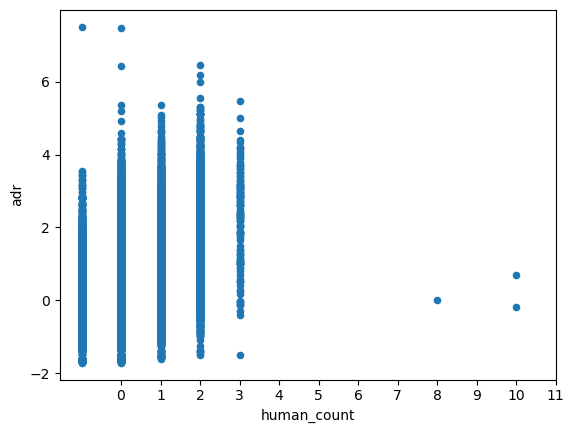

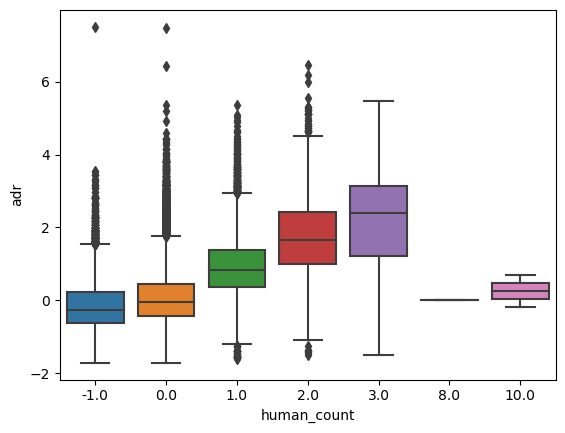

In [37]:
#numeric한 고객수 - adr, lead time -adr 관계만 확인

plt.figure()
scaled_df.plot(kind='scatter', x='human_count', y='adr',xticks=np.arange(0,12,1))
plt.show()

plt.figure()
sns.boxplot(x=scaled_df['human_count'], y =scaled_df['adr'])
plt.show()

<Figure size 1500x1500 with 0 Axes>

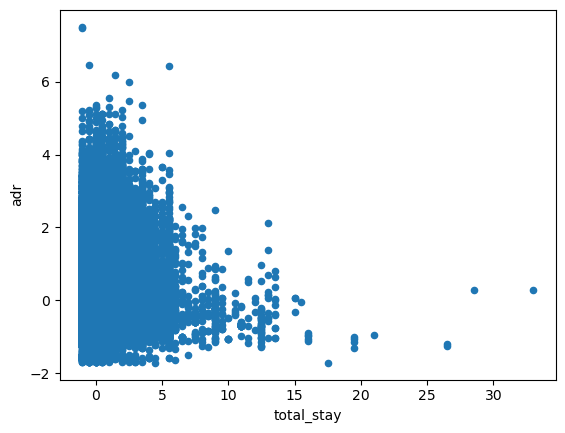

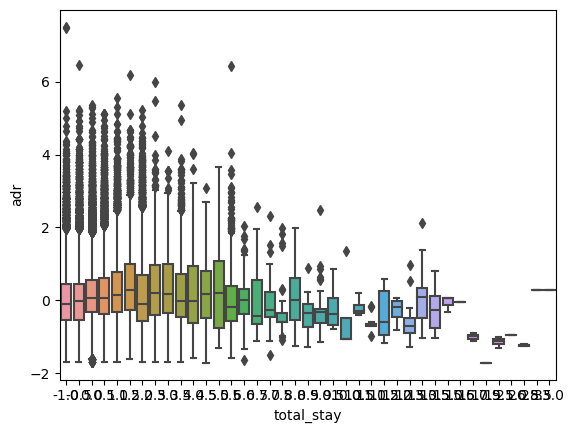

In [38]:
#머무는 시간 - adr

plt.figure(figsize = (15,15))
scaled_df.plot(kind='scatter', x='total_stay', y='adr')
plt.show()

plt.figure()
sns.boxplot(x=scaled_df['total_stay'], y =scaled_df['adr'])
plt.show()

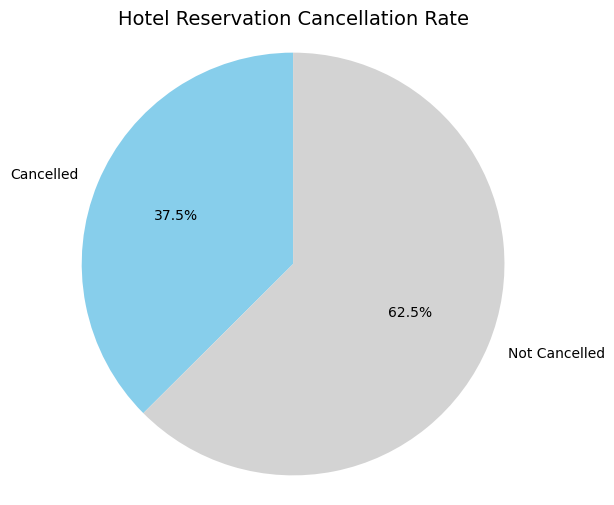

In [39]:
# 전체 예약 취소 비율을 알아보자
total_cancellation_rate = (data['is_canceled'] == 1).mean()
plt.figure(figsize=(6, 6))
labels = ['Cancelled', 'Not Cancelled']
sizes = [total_cancellation_rate, 1 - total_cancellation_rate]
colors = ['skyblue', 'lightgray']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Hotel Reservation Cancellation Rate", fontsize=14)
plt.axis('equal')

plt.show()

Text(0.5, 1.0, 'distribution of the cancelation propotion')

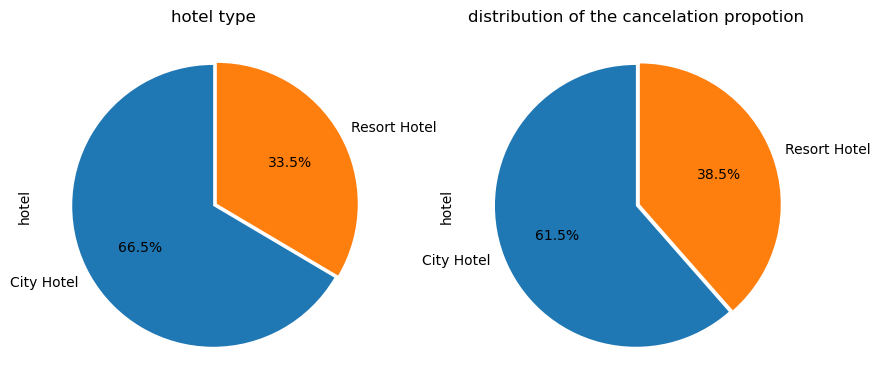

In [40]:
#호텔 별 예약 취소 확인

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
data.hotel.value_counts().plot.pie(explode=(0,.03),startangle=90,autopct='%1.1f%%')
plt.title('hotel type')
plt.subplot(1,2,2)
data[data.is_canceled==0].hotel.value_counts().plot.pie(explode=(0,.03),startangle=90,autopct='%1.1f%%')
plt.title('distribution of the cancelation propotion')

#resort hotel을 선택한 사람이 많아 취소율도 높음

Text(0.5, 1.0, 'Count by Month')

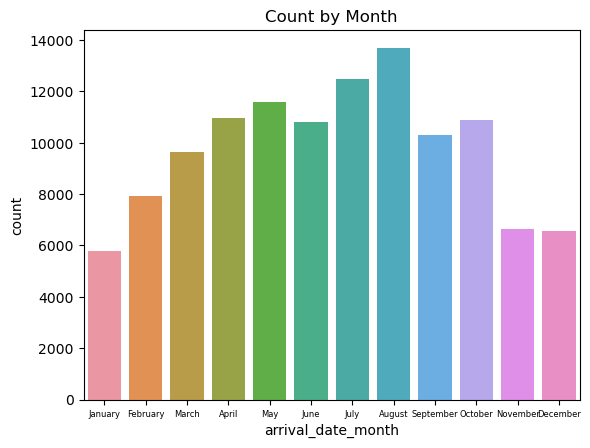

In [41]:
# 가설: 특정 기간에 예약이 도드라지게 많은 기간이 있을 것이다.
sns.countplot(data=data, x='arrival_date_month',
              order = ['January','February','March','April','May','June','July','August','September',
                      'October','November','December'])
plt.xticks(fontsize=6)
plt.title('Count by Month')
# 2월부터 10월까지는 꾸준히 예약 문의가 많았고
# 11월부터 1월. 죽 연말과 연초에는 예약 문의가 상대적으로 적다

Text(0.5, 1.0, 'Count by Month')

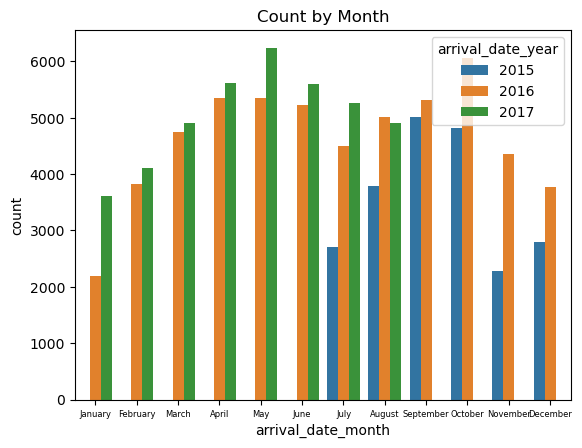

In [42]:
sns.countplot(data=data, x='arrival_date_month',
              order = ['January','February','March','April','May','June','July','August','September',
                      'October','November','December'],
             hue='arrival_date_year')
plt.xticks(fontsize=6)
plt.title('Count by Month')
# 연도별로 보았을 때 데이터는 2015년 7월부터 2017년 8월까지만 있음
# 즉 3개의 년도가 포함된 7월,8월은 당연히 수치가 높게 뜰 수밖에 없음

In [43]:
# 연도 별로 평균내고, 그 수치들을 다 더해서 다시 평균냄
data['arrival_date_month'].value_counts()

August       13707
July         12488
May          11598
April        10952
October      10884
June         10817
September    10319
March         9636
February      7919
November      6635
December      6558
January       5800
Name: arrival_date_month, dtype: int64

In [44]:
data_hypo_1 = data['arrival_date_month'].value_counts().reset_index()
data_hypo_1.columns = ['arrival_date_month', 'count']

for i in range(len(data_hypo_1)):
    if (data_hypo_1.loc[i, 'arrival_date_month'] == 'July' or data_hypo_1.loc[i, 'arrival_date_month'] == 'August'):
        data_hypo_1.loc[i, 'count'] /= 3
    else:
        data_hypo_1.loc[i, 'count'] /= 2

data_hypo_1 = data_hypo_1.set_index('arrival_date_month')

data_hypo_1

,count
arrival_date_month,
August,4569.000000
July,4162.666667
May,5799.000000
April,5476.000000
October,5442.000000
June,5408.500000
September,5159.500000
March,4818.000000
February,3959.500000


Text(0.5, 1.0, 'Mean count by Month and year')

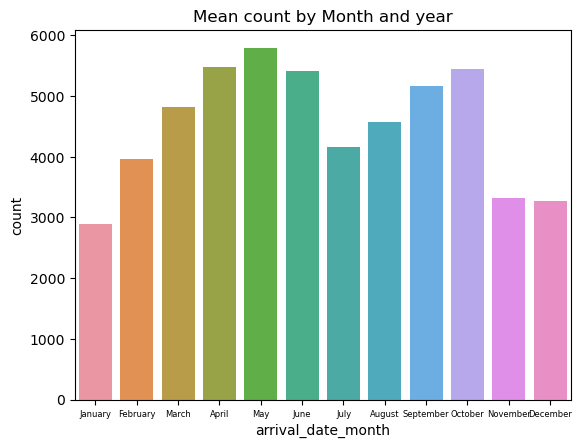

In [45]:
sns.barplot(data=data_hypo_1, x=data_hypo_1.index, y='count',
           order = ['January','February','March','April','May','June','July','August','September',
                      'October','November','December'])
plt.xticks(fontsize=6)
plt.title('Mean count by Month and year')
# 연도별로 평균을 내어서 그래프를 살펴보니 봄과 가을에 예약이 많았음을 확인할 수 있고
# 겨울과 한여름에는 예약 문의가 적어짐을 알 수 있음

In [46]:
# 가설: 아이들과 애기들과 같이 온 어른들은 stays_in_week_nights와 required_car_parking_spaces 가 높지 않을까?

In [47]:
data['with_child'] = data['children'] + data['babies']
data_2 = data[data['with_child'] != 0]

<Axes: xlabel='with_child', ylabel='required_car_parking_spaces'>

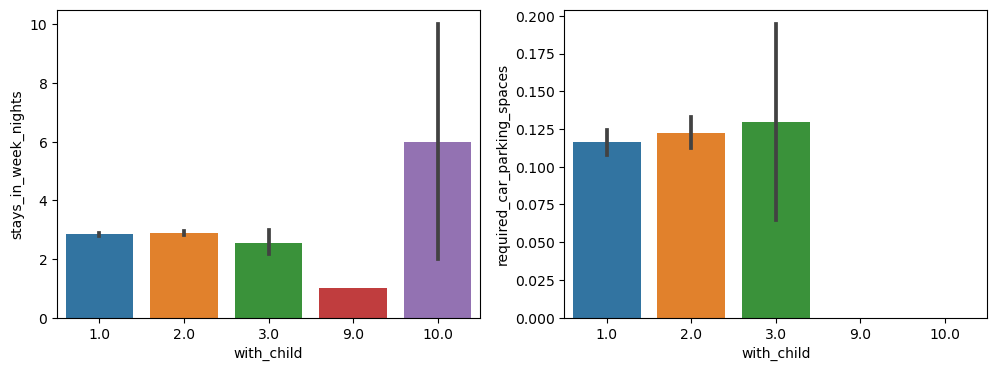

In [48]:
plt.figure(figsize=(12, 4)) 
plt.subplot(1,2,1)
sns.barplot(data=data_2, x='with_child', y='stays_in_week_nights')

plt.subplot(1,2,2)
sns.barplot(data=data_2, x='with_child', y='required_car_parking_spaces')
# 우선 애들이 있는 경우에는 평균적으로 2-3일 정도 머무르는 것을 확인할 수 있음
# 생각보다 필요한 주차장의 크기는 굉장히 적음

In [49]:
# 가설: deposit_type과 days_in_waiting list 에 따른 reservation_status 변화는?

In [50]:
data['deposit_type'].value_counts()

No Deposit    102610
Non Refund     14541
Refundable       162
Name: deposit_type, dtype: int64

<Axes: xlabel='deposit_type', ylabel='days_in_waiting_list'>

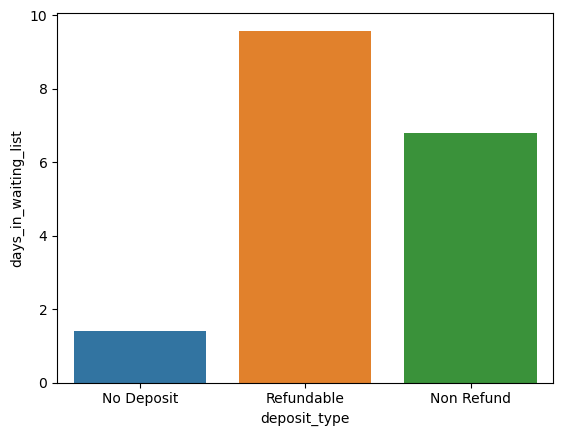

In [51]:
sns.barplot(data=data, x='deposit_type',y='days_in_waiting_list', errorbar = None)
# 보증금을 내는 경우들은 대기 기간이 긴 편이다

<Axes: xlabel='deposit_type', ylabel='count'>

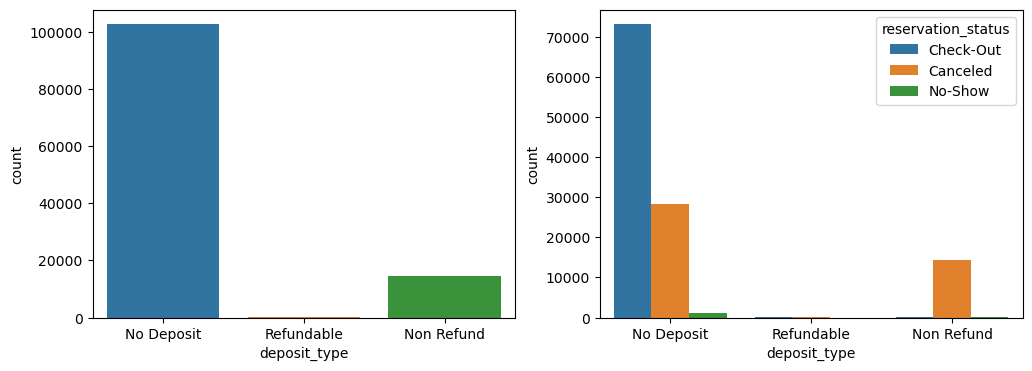

In [52]:
plt.figure(figsize=(12, 4))  
plt.subplot(1,2,1)
sns.countplot(data=data, x='deposit_type')

plt.subplot(1,2,2)
sns.countplot(data=data, x='deposit_type',hue='reservation_status')

# Check-Out 의 분포 등 다양한 정보를 살펴봐야 하겠지만
# 우선 Non Refund의 경우는 Canceled 가 엄청 많네
# Refundable deposit type 같은 경우들은 너무 적어서 큰 의미가 없는 것 같은데(162건)
# deposit_type 에 따라서 어떠한 취소 여부가 나뉜다는 결론은 굉장히 성급해보임
# 왜냐하면 너무 한 쪽에 데이터가 치중되어 있기 때문
# 따라서 어떠한 상관관계가 있는지 없는지 그런 생각을 하는 행위 자체가 부적절해보임

<Axes: xlabel='reservation_status', ylabel='days_in_waiting_list'>

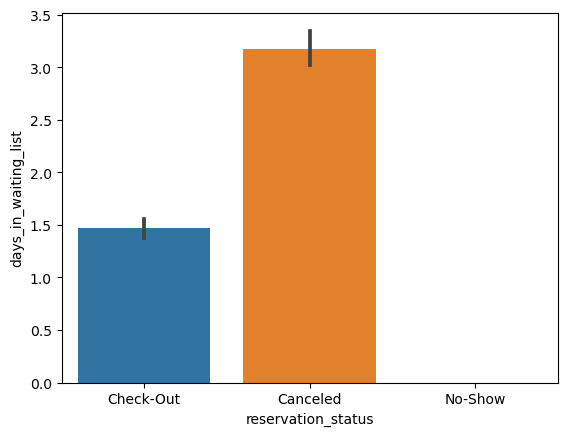

In [53]:
sns.barplot(data=data, y='days_in_waiting_list',x='reservation_status')
# 대기 기간과 취소는 확실히 상관관계가 있어 보인다

In [54]:
#호텔 유형별 손님 분석
resort = pd.DataFrame(data[data['hotel'] == 'Resort Hotel']['customer_type'].value_counts())
city = pd.DataFrame(data[data['hotel'] == 'City Hotel']['customer_type'].value_counts())

hotels = pd.concat([resort, city], axis=1)
hotels.reset_index(inplace=True)
hotels.columns = ['customer_type', 'Resort Hotel', 'City Hotel']
print(hotels)


     customer_type  Resort Hotel  City Hotel
0        Transient         29658       58431
1  Transient-Party          7626       17003
2         Contract          1764        2288
3            Group           259         284


([<matplotlib.axis.XTick at 0x16a672cf510>,
 [Text(0, 0, 'Transient'),
  Text(1, 0, 'Transient-Party'),
  Text(2, 0, 'Contract'),
  Text(3, 0, 'Group')])

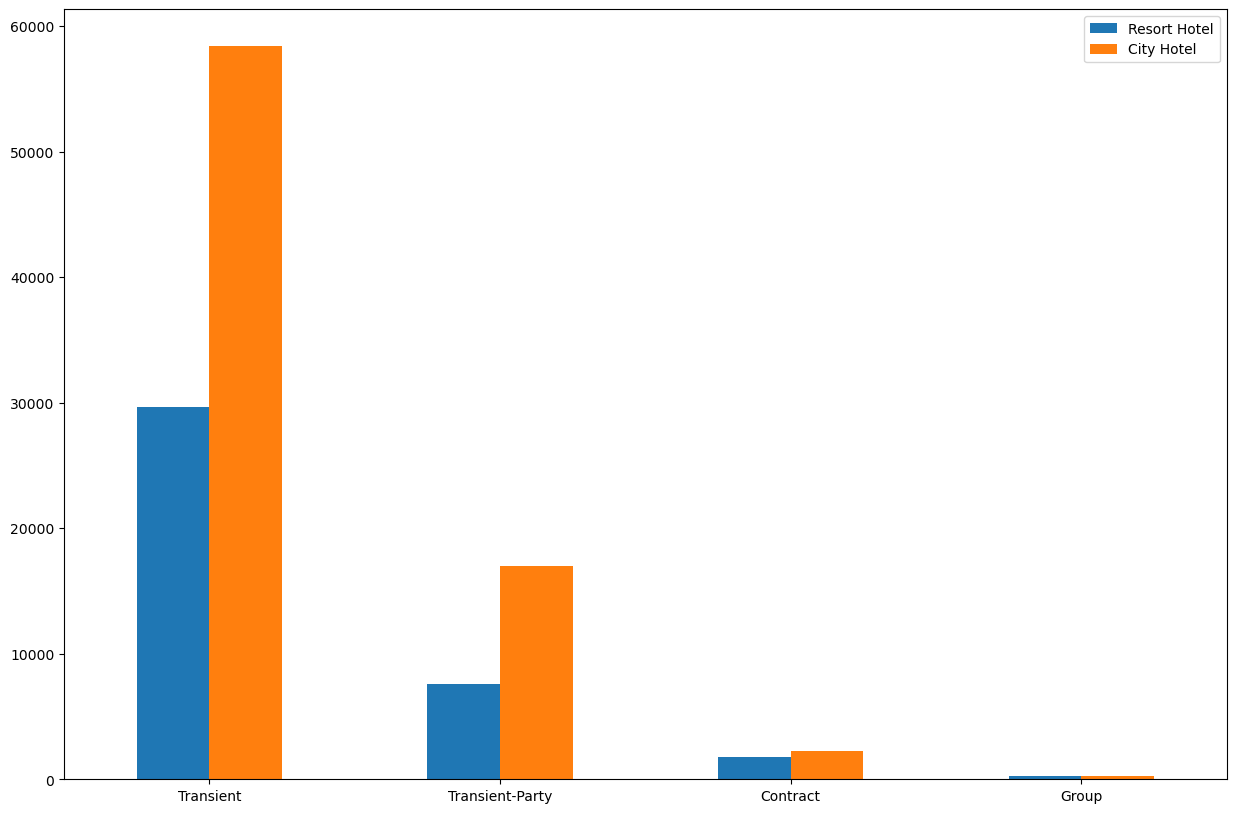

In [55]:
hotels.plot(kind='bar', figsize=(15,10), rot=0)
plt.xticks(np.arange(4), hotels['customer_type'])

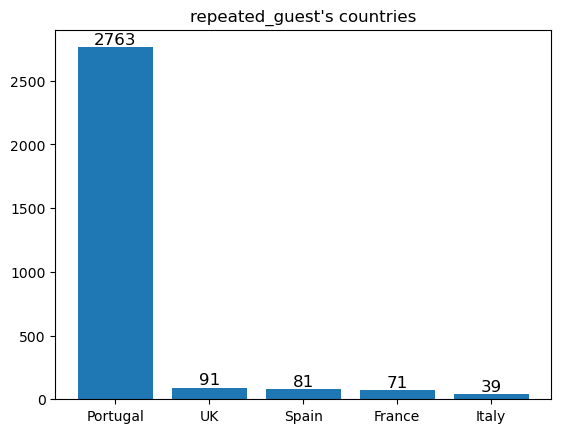

In [56]:
repeated = data[data['is_repeated_guest'] == 1]
countries = repeated['country'].value_counts().head()
x = np.arange(5)
bar = plt.bar(x, repeated['country'].value_counts().head())
plt.xticks(x, ['Portugal', 'UK', 'Spain', 'France', 'Italy'])
plt.title("repeated_guest's countries")

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 12)
    
#포르투갈의 손님들이 많았다. 호텔이 포르투갈에 있는 것으로 추정됨

In [57]:
repeated['agent'].value_counts()
#repeated.drop(['is_canceled', 'lead_time', 'deposit_type'],axis=1,inplace=True)
print(repeated.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3271 entries, 14681 to 119070
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           3271 non-null   object 
 1   is_canceled                     3271 non-null   int64  
 2   lead_time                       3271 non-null   int64  
 3   arrival_date_year               3271 non-null   int64  
 4   arrival_date_month              3271 non-null   object 
 5   arrival_date_week_number        3271 non-null   int64  
 6   arrival_date_day_of_month       3271 non-null   int64  
 7   stays_in_weekend_nights         3271 non-null   int64  
 8   stays_in_week_nights            3271 non-null   int64  
 9   adults                          3271 non-null   int64  
 10  children                        3271 non-null   float64
 11  babies                          3271 non-null   int64  
 12  meal                        

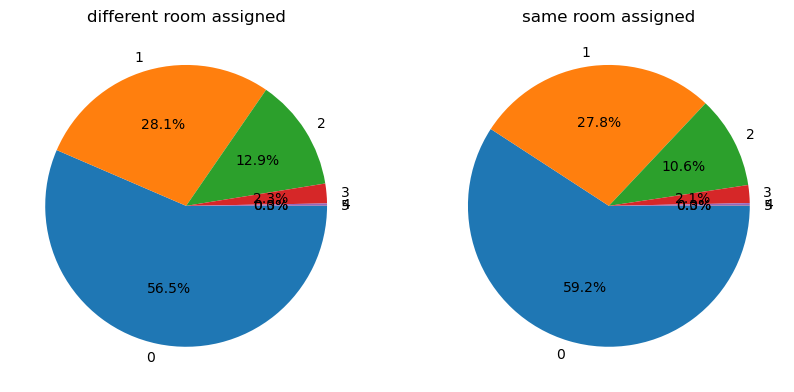

In [58]:
# 가설: reserved_room_type이 assigned_room_type과 다를 때, 요청사항의 횟수가 더 많아지지 않을까?
#14000여개의 데이터를 기반으로 분석
diff = data[data['reserved_room_type'] != data['assigned_room_type']]
same = data[data['reserved_room_type'] == data['assigned_room_type']]

pdiff = pd.DataFrame(diff['total_of_special_requests'].value_counts())
psame = pd.DataFrame(same['total_of_special_requests'].value_counts())
pdiff.reset_index(inplace=True)
psame.reset_index(inplace=True)
pdiff['total_of_special_requests'] /= pdiff['total_of_special_requests'].sum()
psame['total_of_special_requests'] /= psame['total_of_special_requests'].sum()

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.pie(pdiff['total_of_special_requests'], labels=pdiff['index'], autopct='%.1f%%', counterclock=False)
plt.title('different room assigned')

plt.subplot(1,2,2)
plt.pie(psame['total_of_special_requests'], labels=psame['index'], autopct='%.1f%%', counterclock=False)
plt.title('same room assigned')

plt.show()

#유의미한 차이는 없는 것 같다

                 hotel
City Hotel    0.568684
Resort Hotel  0.431316


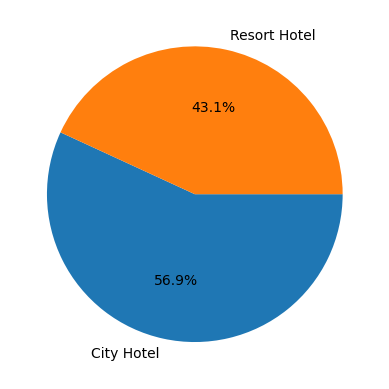

In [59]:
# 가설: 가족이 있다면 resort 호텔을 더 선호할것이다.
withchild = data[(data['adults'] > 0) & (data['children'] + data['babies'] > 0)]
pwith = pd.DataFrame(withchild['hotel'].value_counts())
pwith['hotel'] /= pwith['hotel'].sum()
plt.pie(pwith['hotel'], labels=pwith.index, autopct='%.1f%%', counterclock=False)
print(pwith)
## 그러나 city호텔의 선호도가 더 높았다